# Pandas Exercises

* These short exercises involve a combination of filtering, aggregating and joining data to test your knowledge.
* This is also a chance to make sure your notebook environment is working properly!
* Discuss in your group the different ways you could accomplish these tasks.
* Take your time, and feel free to research/consult last semester's notes.

In [1]:
import pandas as pd

# This dataframe represents a list of transactions from a very strange
# low-value auction. (I know, I'm not very creative).
sold_items = pd.DataFrame({
    "sale_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "type": [
        "book", "photo", "book", "pen", "book",
        "pen", "pen", "book", "pen", "pen"
    ],
    "price": [
        10, 5, 9, 1, 7, 0.9, 0.5, 15, 1.2, 0.5,
    ]
})
sold_items

,sale_id,type,price
0,1,book,10.0
1,2,photo,5.0
2,3,book,9.0
3,4,pen,1.0
4,5,book,7.0
5,6,pen,0.9
6,7,pen,0.5
7,8,book,15.0
8,9,pen,1.2
9,10,pen,0.5


Q1. Find a single line of code to count the number of items of each type (books, pens, photos) sold.

In [6]:

print(sold_items['type'].value_counts(),'\n')

book_num = (sold_items['type']=='book').sum()
pen_num = (sold_items['type']=='pen').sum()
print(f"number of books :{book_num}")
print(f"number of pens: {pen_num}")



type
pen      5
book     4
photo    1
Name: count, dtype: int64 

number of books :4
number of pens: 5


Q2. Find a single line of code to calculate the total value of all transactions.

In [11]:
total_transac = sold_items['price'].sum()
print(total_transac)

50.1


Q3. Find a single line of code to calculate some statistic (e.g. mean, max, std.dev) of the sale price of a pen in this auction.

In [17]:
stats=sold_items[sold_items.type=='pen']['price'].std()
#print(sold_items.sold_items.type=='pen'.price).std()
print(stats)

0.3114482300479487


In [19]:
# This dataframe contains prices at which the auctioneer bought each item type.
bought_items = pd.DataFrame({
    "type": ["book", "photo", "pen"],
    "cost": [11, 6, 0.6],
})
bought_items

,type,cost
0,book,11.0
1,photo,6.0
2,pen,0.6


Q4. Find a single line of code which creates a new dataframe with the 'bought' cost of each item included in the sold_items table.

In [21]:
merged_items=pd.merge(sold_items,bought_items,on='type',how='right')
merged_items

,sale_id,type,price,cost
0,1,book,10.0,11.0
1,3,book,9.0,11.0
2,5,book,7.0,11.0
3,8,book,15.0,11.0
4,2,photo,5.0,6.0
5,4,pen,1.0,0.6
6,6,pen,0.9,0.6
7,7,pen,0.5,0.6
8,9,pen,1.2,0.6
9,10,pen,0.5,0.6


Q5. Find a single line of code which returns a dataframe containing only the items for which the auctioneer made a profit.

In [23]:
merged_items.loc[(merged_items.price>merged_items.cost)]

,sale_id,type,price,cost
3,8,book,15.0,11.0
5,4,pen,1.0,0.6
6,6,pen,0.9,0.6
8,9,pen,1.2,0.6


Q6. Find code to recreate the histogram plot below.

In [24]:
import seaborn as sns

Text(0.5, 1.0, 'example')

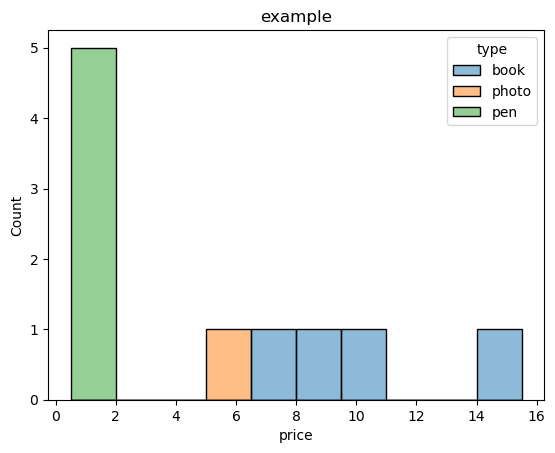

In [33]:
sns.histplot(data=merged_items,x='price',hue='type',binwidth=1.5).set_title("example")

Q7. Find code to recreate the scatter plot below.

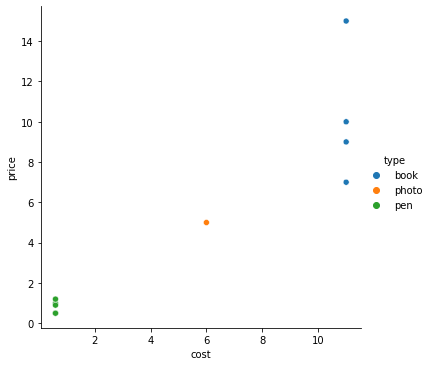

<Axes: xlabel='cost', ylabel='price'>

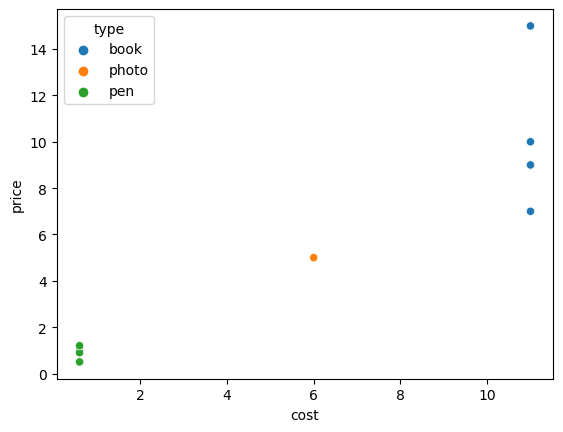

In [34]:
sns.scatterplot(data=merged_items,x='cost',y='price',hue='type')